<a href="https://colab.research.google.com/github/katherymbr/Dim_fractalMontecarlo_Sierpinskipinsk/blob/main/Strategy_for_Automatic_Detection_and_Segmentation_of_Microcalcifications_in_Mammograms_Using_Image_Processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strategy for Automatic Detection and Segmentation of Microcalcifications in Mammograms Using Image Processing and Lightweight Algorithms

In [ ]:
# Authors:
# - Katherym Bambague Ruíz
# - Ronny Guevara
#
# Affiliation: Universidad Nacional del Sur
# Image Science Laboratory LCI
#
# Date: 12/09/2024

## Introduction
This notebook presents a strategy for automatic detection and segmentation of microcalcifications in mammograms using image processing and lightweight algorithms.
It includes all the necessary steps to reproduce the results of our study.

## Import libraries

In [2392]:
pip install pydicom

In [2393]:
# Import python libraries

import imageio as io
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import pandas as pd
import cv2
from PIL import Image
from skimage import data
from skimage.filters import threshold_multiotsu
import matplotlib
from scipy.stats import linregress
import math
import random
from skimage import io, color, filters, data, exposure
from typing_extensions import assert_type
import copy
from pydicom import dcmread
from scipy.stats import linregress
import math
import random
from skimage import io, color, filters, data, exposure

* Start the algorithm execution time

In [2394]:
import time

# Start time
start_time = time.time()

## FUNCTIONS

# F - Img open .pgm (MIAS)

In [2395]:
 # Open the image in pgm format

def openImage(rute):
  image= io.imread(rute)
  return image

ruta='/content/drive/MyDrive/'

# F - Img size pgm (MIAS)

In [2396]:
# Image Size and Pixel Value Range

def sizeImage(image):
    """Prints the dimensions and the minimum and maximum pixel values of the image."""
    print(f'Image dimensions: {image.shape}')
    print(f'Minimum pixel value: {image.min()}')
    print(f'Maximum pixel value: {image.max()}')

# F - Normalization of an image

In [2397]:
# I normalize the cropped image and with Logarithmic tranf. I scale it from 0 to 1

def normalize_image(img):
    img_norm = (img - img.min()) / (img.max() - img.min())
    return img_norm

# F - Visualization

In [2398]:
def plotImageTittle2(image, title, cmap = 'gray', size=100):
    fig, ax = plt.subplots(dpi=size)
    ax.imshow(image,cmap=cmap)
    plt.title(str(title))
    plt.show

In [2399]:
# Plot an image with  title

def plotImageTittle(image, title, size=100):
    fig, ax = plt.subplots(dpi=size)
    ax.imshow(image,cmap='gray')
    plt.title(str(title))
    plt.show

In [2400]:
# Plot two horizontal images with title

def plotImageTwoTittle(image1, image2, title1, title2, size=100):
    fig, ax = plt.subplots(1, 2, dpi=size)
    # First sub-graph
    ax[0].imshow(image1, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title(str(title1))
    # Second sub-graph
    ax[1].imshow(image2, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(title2))

    plt.show()

In [2401]:
#  Plot three horizontal images with title

def plotImageThreeTittle(image1, image2, image3, title1, title2, title3, size=400):
    fig, ax = plt.subplots(1,3, dpi=size)
    ax[0].imshow(image1, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title(str(title1), fontsize=5)

    ax[1].imshow(image2, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(title2), fontsize=5)

    ax[2].imshow(image3, cmap='gray')
    ax[2].set_axis_off()
    ax[2].set_title(str(title3), fontsize=5)
    plt.show()

In [2402]:
# Plot ten horizontal images with title

def plotImageTenTittle(img1, img2, img3, img4, img5, img6, img7, img8, img9, img10, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10):
    fig, axes = plt.subplots(2, 5, figsize=(18, 6), dpi=200)
    fig.subplots_adjust(hspace=0.1, wspace=0)

    # Lista de imágenes y títulos
    imgs = [img1, img2, img3, img4, img5, img6, img7, img8, img9, img10]
    titles = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

    for i, (img, title) in enumerate(zip(imgs, titles)):
        ax = axes[i // 5, i % 5]
        # Cambia la paleta de la última imagen
        if i == len(imgs) - 1:
            ax.imshow(img, cmap="hot")
        else:
            ax.imshow(img, cmap="gray")
        ax.axis('off')
        ax.set_title(str(title), fontsize=10)

    plt.show()

# F - Luminance histogram

In [2403]:
# Plot a histogram - range=[0, 1]

def histogram(img, n_bins, title=''):
    h = img.ravel()
    _, nbins = np.histogram(h, bins=n_bins, range=[0, 1])

    plt.hist(h, bins=nbins, edgecolor='black')
    plt.title(format(title))
    #plt.grid()
    plt.show()

In [2404]:
 # Plot two histograms - range=[0, 1]

def hyper_histogram(hyp1, hyp2, n_bins, title1='', title2=''):

    h1 = hyp1[:,:].ravel()
    h2 = hyp2[:,:].ravel()
    _, nbins = np.histogram(h1, bins=n_bins, range=[0, 1])

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].hist(h1, bins=nbins, edgecolor='black')
    axs[0].set_title(format(title1))
    plt.grid()
    axs[1].hist(h2, bins=nbins, edgecolor='black')
    axs[1].set_title(format(title2))
    plt.grid()
    plt.show

In [2405]:
# visualize image and histogram - range=[0, 1]

def visualize_imag_histogram(image, n_bins=256, size=(12, 6), dpi=80, image_title='Grayscale Image', hist_title='Luminance Histogram'):
    # Create a figure with two subplots: one for the image and one for the histogram
    fig, axs = plt.subplots(1, 2, figsize=size, dpi=dpi)

    # Display the grayscale image
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title(image_title)
    axs[0].axis('off')  # Hide the axes of the image

    # Calculate and plot the histogram in the second subplot
    axs[1].hist(image.ravel(), bins=n_bins, range=[0, 1], edgecolor='black')
    axs[1].set_title(hist_title)
    axs[1].set_xlabel('Luminance')
    axs[1].set_ylabel('Frequency')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


# F - Crop images .pgm (MIAS)

In [2406]:
# Crop images- DATASET: Mias

def area_crop(image,x,y,r):
  print('Coordinates for crop:',x ,",",y,",",r)
  img_copy = np.copy(image)
  y = image.shape[0] - y
  img_recorte = img_copy[y-r:y+r, x-r:x+r]
  return img_recorte

# F - Draw box .pgm (MIAS)

In [2407]:
# In this function the origin of coordinates is in the lower left corner
# DATASET: Mias

def draw_area(img,x, y, r):
    #Image origin at (x=0, y=maximo_y)
    print('Coordinates:',x ,",",y,",",r)
    y = img.shape[0] - y
    img_copy = np.copy(img)
    cv2.line(img_copy,(x-r,y-r),(x+r,y-r),(255,0,0),4)
    cv2.line(img_copy,(x-r,y+r),(x+r,y+r),(255,0,0),4)
    cv2.line(img_copy,(x-r,y-r),(x-r,y+r),(255,0,0),4)
    cv2.line(img_copy,(x+r,y-r),(x+r,y+r),(255,0,0),4)
    plt.imshow(img_copy, cmap='gray')
    #return img_copy

# F - Draw box four points . dcm

In [2408]:
# Draw a rectangle with four coordinates - dcm format

def affected_area_dcm(img5, x1, y1, x2, y2, x3, y3, x4, y4):
    img5_copy = np.copy(img5)

    # Color in RGB format (255, 87, 51) corresponding to #FF5733
    color = (255, 87, 51)

    # Draw the rectangle lines in the specified color
    cv2.line(img5_copy, (x1, y1), (x2, y2), color, 5)
    cv2.line(img5_copy, (x2, y2), (x3, y3), color, 5)
    cv2.line(img5_copy, (x3, y3), (x4, y4), color, 5)
    cv2.line(img5_copy, (x4, y4), (x1, y1), color, 5)

    return img5_copy

# F - Crop .dcm

In [2409]:
# Function to CROP A mammographic - dcm format

def image_crop_dcm(image, y1, y4, x1, x2):
    image_crop = image[y1:y4, x1:x2]
    return image_crop


# F - Preprocessing functions

In [2410]:
# from RGB to YIQ

def rgb_to_y(matrix_rgb):
    matrix_rgb = np.array(matrix_rgb)
    coefficients = np.array([0.299, 0.587, 0.114])
    matrix_y = np.dot(matrix_rgb, coefficients)
    return matrix_y

# F - Power filter

In [2411]:
# Define a function to compute the optimal exponent factor based on pixel intensity distribution


# Define a function to compute the optimal exponent factor based on pixel intensity distribution

def calculate_optimal_exponent(image, percentile=90, lower_bound=2, upper_bound=20, scaling_factor=0.97):
    # Calculate the specified percentile of pixel intensities
    intensity_percentile = np.percentile(image, percentile / 100.0 * np.max(image))

    # Suggest an exponent based on the computed percentile
    suggested_n = lower_bound + (upper_bound - lower_bound) * (1 - intensity_percentile)

    # Apply the scaling factor to adjust the suggested exponent
    suggested_n_new = suggested_n * scaling_factor
    print(f"Original suggested exponent: {suggested_n}")
    print(f"Using only {scaling_factor * 100}% of the suggested exponent. The new suggested exponent is: {suggested_n_new}")

    # Ensure the new exponent is within the specified range
    return max(lower_bound, min(upper_bound, suggested_n_new))



# F - Multi Otsu

In [2412]:
# Function to apply Multi-Otsu and decompress the thresholds

def multi_Otsu(img_power, dpi=100):
    plt.rcParams['font.size'] = 9
    image = img_power
    thresholds = threshold_multiotsu(image)
    otsu_threshold1, otsu_threshold2 = thresholds
    print("The Multi-Otsu threshold is:", otsu_threshold1)
    print("The Multi-Otsu threshold is:", otsu_threshold2)
    regions = np.digitize(image, bins=thresholds)

    # Create subplots with the specified dpi
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5), dpi=dpi)
    ax[0].imshow(image, cmap='gray', clim=(0, 1))
    ax[0].set_title('Image')
    ax[0].axis('off')
    ax[1].hist(image.ravel(), bins=30)
    ax[1].set_title('Histogram')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')
    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title('Multi-Otsu (three types)')
    ax[2].axis('off')
    plt.subplots_adjust()
    plt.show()

    return regions, otsu_threshold1, otsu_threshold2

# F - Quantification of the Multi Otsu classes

In [2413]:
# Function to create a bar chart and a table for pixel count and percentage

def plot_and_table(image, regions, otsu_threshold1, otsu_threshold2, dpi=100):
    # Define the masks for each class
    mask_class1 = (regions == 0)
    mask_class2 = (regions == 1)
    mask_class3 = (regions == 2)

    # Calculate the number of pixels in each class
    count_class1 = np.count_nonzero(mask_class1)
    count_class2 = np.count_nonzero(mask_class2)
    count_class3 = np.count_nonzero(mask_class3)

    # Total number of pixels
    total_pixels = regions.size

    # Calculate the percentage of pixels in each class
    percent_class1 = (count_class1 / total_pixels) * 100
    percent_class2 = (count_class2 / total_pixels) * 100
    percent_class3 = (count_class3 / total_pixels) * 100

    # Calculate the mean and standard deviation for each class using the original image
    mean_class1 = np.mean(image[mask_class1])
    std_class1 = np.std(image[mask_class1])
    mean_class2 = np.mean(image[mask_class2])
    std_class2 = np.std(image[mask_class2])
    mean_class3 = np.mean(image[mask_class3])
    std_class3 = np.std(image[mask_class3])

    # Define the intervals for each class
    intervals = [
        f"(0, {otsu_threshold1:.6f})",
        f"({otsu_threshold1:.6f}, {otsu_threshold2:.6f})",
        f"({otsu_threshold2:.6f}, 1)"
    ]

    # Create a DataFrame for the table
    data = {
        'Class': ['Class 1 (Blue)', 'Class 2 (Green)', 'Class 3 (Red)'],
        'Value Range': intervals,
        'Pixel Count': [count_class1, count_class2, count_class3],
        'Pixel Percentage (%)': [round(percent_class1, 6), round(percent_class2, 6), round(percent_class3, 6)],
        'Mean Value': [f"{mean_class1:.6f}", f"{mean_class2:.6f}", f"{mean_class3:.6f}"],
        'Standard Deviation': [f"{std_class1:.6f}", f"{std_class2:.6f}", f"{std_class3:.6f}"]
    }
    df = pd.DataFrame(data)

    # Adjust pandas display settings to show 6 decimal places
    pd.set_option('display.float_format', '{:.6f}'.format)

    # Print the table
    print("\nResults Table:")
    print(df)

    # Create a bar chart for the pixel count per class
    fig, ax = plt.subplots(dpi=dpi)
    ax.bar(df['Class'], df['Pixel Count'], color=['blue', 'green', 'red'])
    ax.set_title('Pixel Count per Class')
    ax.set_xlabel('Class')
    ax.set_ylabel('Pixel Count')
    plt.tight_layout()
    plt.show()

    return df

# F - Opening filter

In [2414]:
# opening filter

def opening_filter(image):
  # Realiza la operación de apertura morfológica
  kernel = np.ones((2,2), np.uint8)  # Definir un kernel de 3x3
  opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
  return opening  # Asegúrate de retornar el resultado


# F - Anscombe transformation

In [2415]:
# Anscombe transformation

def anscombe(img):
  img_anscombe= 2.0*np.sqrt(img + 3.0/8.0)
  sizeImage(img_anscombe)
  return(img_anscombe)

# F - Cosine function

In [2416]:
# Intensity using the cosine function

def cosine_function(img):
  img_cosine= 1-np.cos((np.pi/2)*(img/255.0))
  sizeImage(img_cosine)
  return(img_cosine)

# F - DoG filter function

In [2417]:
# DoG filter function (difference of gaussians)

def DoG_filter(img, k1, k2):
    # apply a gaussian blur with a 3x3 kernel to create the lower-frequency component
    dog_low = cv2.GaussianBlur(img, (3, 3), 0)

    # apply a gaussian blur with a 5x5 kernel to create the higher-frequency component
    dog_high = cv2.GaussianBlur(img, (5, 5), 0)

    # calculate the difference of gaussians (DoG) by combining the two blurred images with specified weights
    dog = k1 * dog_low - k2 * dog_high

    # return the resulting dog image
    return dog

# F - Change colors of Otsu thresholding (black to white)

In [2418]:
# Change colors of Otsu thresholding (black to white)

def apply_otsu_and_plot(image, title, size=100):
    # Copiar la imagen normalizada
    image_copy = copy.copy(image)

    # Calcular el umbral de Otsu
    otsu_threshold = threshold_otsu(image)

    # Aplicar el umbral de Otsu
    image_copy[image <= otsu_threshold] = 1
    image_copy[image > otsu_threshold] = 0


    # Retornar la imagen procesada
    return image_copy


# EXECUTION

# Open Img. pgm (MIAS)

Image dimensions: (1024, 1024)
Minimum pixel value: 0
Maximum pixel value: 235


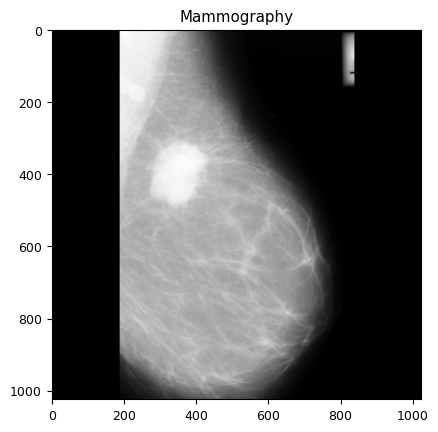

In [2419]:
# Open the image in pgm format- DATASET Mias:  http://peipa.essex.ac.uk/info/mias.html

initial_img = openImage(ruta+'mdb184.pgm')
plotImageTittle(initial_img, "Mammography", size=100)
#plt.imshow(initial_img, cmap='hot')
sizeImage(initial_img)


# Draw and Crop img .pgm (MIAS)

Draw img .pgm (MIAS)

Coordinates: 352 , 624 , 114


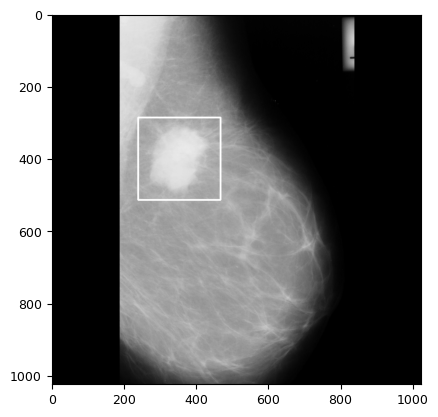

In [2420]:

img_box= draw_area(initial_img, 352, 624, 114)
#sizeImage(img_box)


Crop img .pgm (MIAS)

Coordinates for crop: 352 , 624 , 114
Image dimensions: (228, 228)
Minimum pixel value: 144
Maximum pixel value: 234
Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


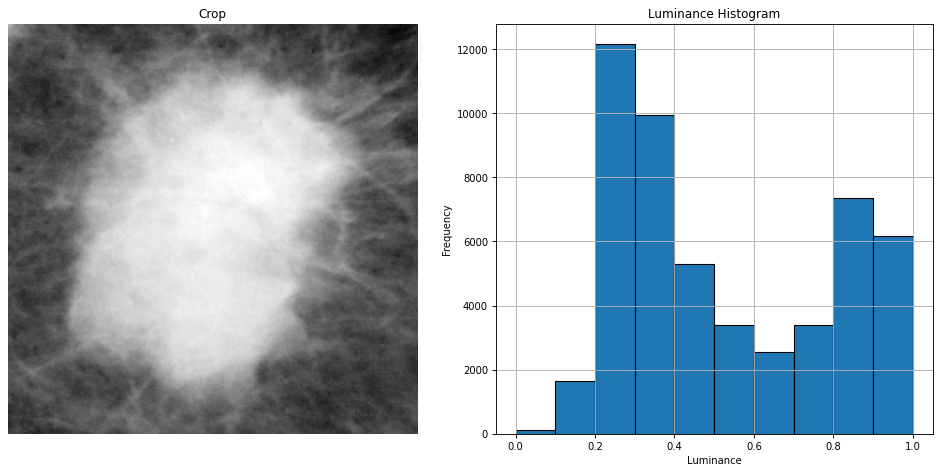

In [2421]:

# crop and normalize the image according to the Mias dataset coordinates
imag_crop= area_crop(initial_img, 352, 624, 114)
sizeImage(imag_crop)

# Normalize the cropped image scaling it to the range [0, 1]
imag_crop_norm = normalize_image(imag_crop)
sizeImage(imag_crop_norm)
#plt.imshow(imag_crop_norm, cmap='hot')
visualize_imag_histogram(imag_crop_norm, n_bins=10, size=(12, 6), dpi=80, image_title='Crop', hist_title='Luminance Histogram')


# Open Img .dcm

**Note:** Only comment out this part of the code if your image is in `DCM` format.


In [2422]:
"""
initial_img = dcmread(ruta + 'Articulo mamografias-2024/JAURI_LIDIAM_2021-01-13_RCC_1.2.840.113681.168431371.1610352954.3928.1962.dcm')
initial_img = initial_img.pixel_array #convertir imagen .dcm a Array

sizeImage(initial_img)
plotImageTittle(initial_img, "Mammography", size=100)
"""

'\ninitial_img = dcmread(ruta + \'Articulo mamografias-2024/JAURI_LIDIAM_2021-01-13_RCC_1.2.840.113681.168431371.1610352954.3928.1962.dcm\')\ninitial_img = initial_img.pixel_array #convertir imagen .dcm a Array\n\nsizeImage(initial_img)\nplotImageTittle(initial_img, "Mammography", size=100)\n'

# Draw and crop Img .dcm

**Note:** Only comment out this part of the code if your image is in `DCM` format.

* Draw Img .dcm

In [2423]:
"""
imag_box= affected_area_dcm(initial_img, 2397,1848,2684,1846,2684,2187,2396,2186)
plotImageTittle(imag_box, "Draw", size=100)
"""

'\nimag_box= affected_area_dcm(initial_img, 2397,1848,2684,1846,2684,2187,2396,2186)\nplotImageTittle(imag_box, "Draw", size=100)\n'

* Crop Img .dcm

In [2424]:
"""
imag_crop= image_crop_dcm(initial_img , 1848, 2184, 2397, 2684)
#plotImageTittle(imag_crop, "Crop", size=100)
sizeImage(imag_crop)

# Normalize the cropped image scaling it to the range [0, 1]
imag_crop_norm = normalize_image(imag_crop)
sizeImage(imag_crop_norm)
#plt.imshow(imag_crop_norm, cmap='hot')
visualize_imag_histogram(imag_crop_norm, n_bins=10, size=(12, 6), dpi=80, image_title='Crop', hist_title='Luminance Histogram')
"""

'\nimag_crop= image_crop_dcm(initial_img , 1848, 2184, 2397, 2684)\n#plotImageTittle(imag_crop, "Crop", size=100)\nsizeImage(imag_crop)\n\n# Normalize the cropped image scaling it to the range [0, 1]\nimag_crop_norm = normalize_image(imag_crop)\nsizeImage(imag_crop_norm)\n#plt.imshow(imag_crop_norm, cmap=\'hot\')\nvisualize_imag_histogram(imag_crop_norm, n_bins=10, size=(12, 6), dpi=80, image_title=\'Crop\', hist_title=\'Luminance Histogram\')\n'

# Power filter

Original suggested exponent: 17.400000000000002
Using only 68.0% of the suggested exponent. The new suggested exponent is: 11.832000000000003
Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


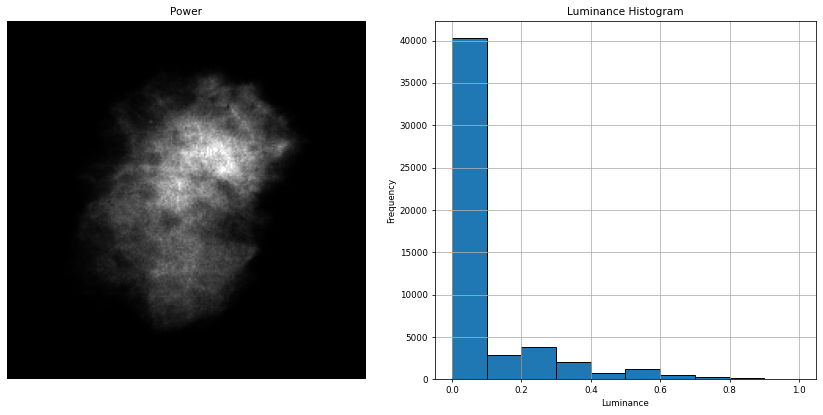

In [2425]:

# Compute the optimal exponent value using the function 'calculate_optimal_exponent'
# To scaling_factor enter a number between 0 and 1 (is a percentage)

optimal_n = calculate_optimal_exponent(imag_crop_norm, percentile=90, lower_bound=2, upper_bound=20, scaling_factor=0.68)

# Apply the power transformation to the normalized cropped image using the optimal exponent
imag_power = imag_crop_norm**optimal_n

sizeImage(imag_power)
#plt.imshow(imag_power, cmap='hot')
visualize_imag_histogram(imag_power, n_bins=10, size=(12, 6), dpi=70, image_title='Power', hist_title='Luminance Histogram')

# Multi Otsu

The Multi-Otsu threshold is: 0.134765625
The Multi-Otsu threshold is: 0.443359375


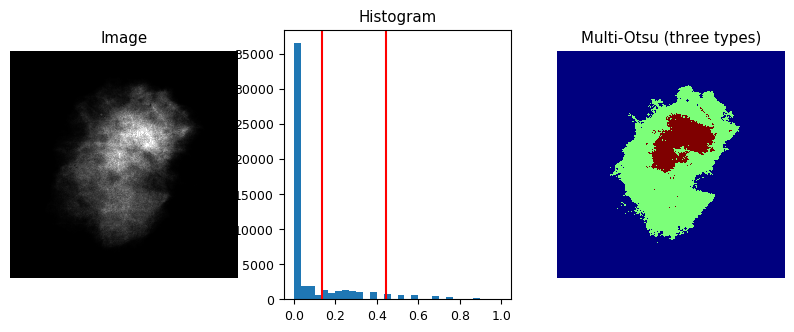


Results Table:
             Class           Value Range  Pixel Count  Pixel Percentage (%)  \
0   Class 1 (Blue)         (0, 0.134766)        40972             78.816559   
1  Class 2 (Green)  (0.134766, 0.443359)         8818             16.962912   
2    Class 3 (Red)         (0.443359, 1)         2194              4.220529   

  Mean Value Standard Deviation  
0   0.009391           0.024469  
1   0.267485           0.089038  
2   0.643702           0.124479  


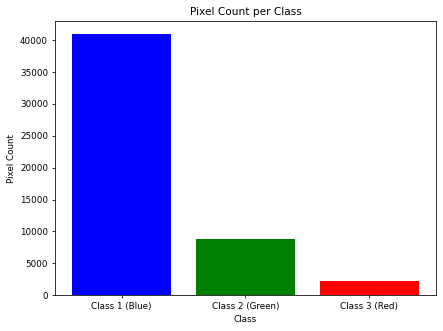

In [2426]:
# imag_power is your input image
imag_multiOtsu, otsu_threshold1, otsu_threshold2 = multi_Otsu(imag_power, dpi=100)

# Call the plot_and_table function with the required parameters
df = plot_and_table(imag_power, imag_multiOtsu, otsu_threshold1, otsu_threshold2, dpi=70)


# Mask to keep only 2 classes of the multiOtsu

In [2427]:
# Create a copy of the Otsu segmented image
imag_multiOtsu_copy1 = copy.copy(imag_multiOtsu)

# Apply the threshold - Modify the threshold value
imag_multiOtsu_copy1[imag_multiOtsu < 2] = 0  # Use 2 because the Otsu mask has 3 values: 0=blue, 1=green, 2=red (where microcalcifications are)
imag_multiOtsu_copy1=imag_multiOtsu_copy1.astype(np.uint8)

# Normalize the cropped image scaling it to the range [0, 1]
imag_multiOtsu_norm= normalize_image(imag_multiOtsu_copy1)
sizeImage(imag_multiOtsu_norm)

#plotImageTittle(imag_multiOtsu_norm, "MultiOtsu_Mask (two types)", size=100)

Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


# Opening Filter

In [2428]:
# Ensure the result of opening_filter is a valid numerical array

imag_opening = opening_filter(imag_multiOtsu_copy1).astype(np.float32)  # Convert to float32 if necessary

imag_opening_norm = normalize_image(imag_opening)

sizeImage(imag_opening_norm) # probar con kernel de 2*2. aquie esta con 3*3
#plotImageTwoTittle(imag_multiOtsu_norm, imag_opening_norm, "MultiOtsu (two types)", "MultiOtsu Opening", size=120)

Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


# Convolution between the Otsu mask refined with the opening filter and the image corresponding to the mammogram crop.

In [2429]:
imag_crop_norm_copy = copy.copy(imag_crop_norm)
imag_crop_norm_copy[imag_opening_norm == 0] = 0


#plotImageTittle(imag_crop_norm_copy, "imag_crop_norm_copy", size=100)
sizeImage(imag_crop_norm_copy)

Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


# Anscombe transformation

In [2430]:
imag_anscombe = anscombe(imag_crop_norm_copy)
imag_anscombe_norm = normalize_image(imag_anscombe)

sizeImage(imag_anscombe_norm)
#plotImageTittle(imag_anscombe_norm, "Convolution (Crop*Opening)", size=100)

Image dimensions: (228, 228)
Minimum pixel value: 1.224744871391589
Maximum pixel value: 2.345207879911715
Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


# Cosine function

In [2431]:
imag_cosine= cosine_function(imag_anscombe_norm)
imag_cosine_norm=  normalize_image(imag_cosine)


sizeImage(imag_cosine_norm)
#plotImageTittle(imag_cosine_norm, "Cosine", size=100)

Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.8972651273152508e-05
Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


# DoG filter

In [2432]:
img_dog = DoG_filter(imag_cosine_norm, k1=1.1, k2=0.9)

img_dog_norm = normalize_image(img_dog)
sizeImage(img_dog_norm)
#plotImageTittle(img_dog_norm, "DoG filter", size=100)

Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


# Change colors of Otsu thresholding (black to white)


In [2433]:
# Change colors of Otsu thresholding (black to white)

imag_dog_norm_copy = apply_otsu_and_plot(img_dog_norm, "end", size=100)
#plotImageTittle(imag_dog_norm_copy , "Prod", size=100)


# Segmented microcalcification

Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 0.9777777777777777
Image dimensions: (228, 228)
Minimum pixel value: 0.0
Maximum pixel value: 1.0


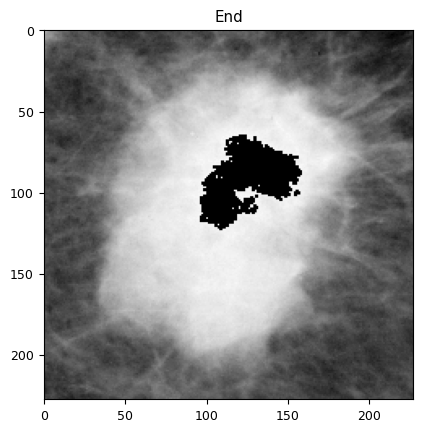

In [2434]:
end = copy.copy(imag_crop_norm)
end = end * imag_dog_norm_copy
sizeImage(end)

end_norm = normalize_image(end)
sizeImage(end_norm)
plotImageTittle2(end, "End",'gray', size=100)

* End the algorithm execution time

In [2435]:
# Mark the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

print(f"Execution time is: {execution_time} seconds")

Execution time is: 2.9769742488861084 seconds


# Colormaps

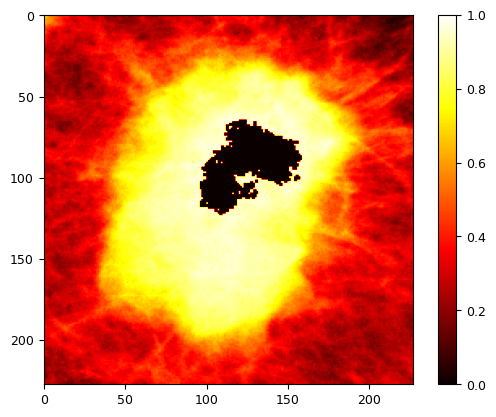

In [2436]:
# palette 'hot'

colormaps = plt.imshow(end_norm, cmap='hot')
plt.colorbar(colormaps)


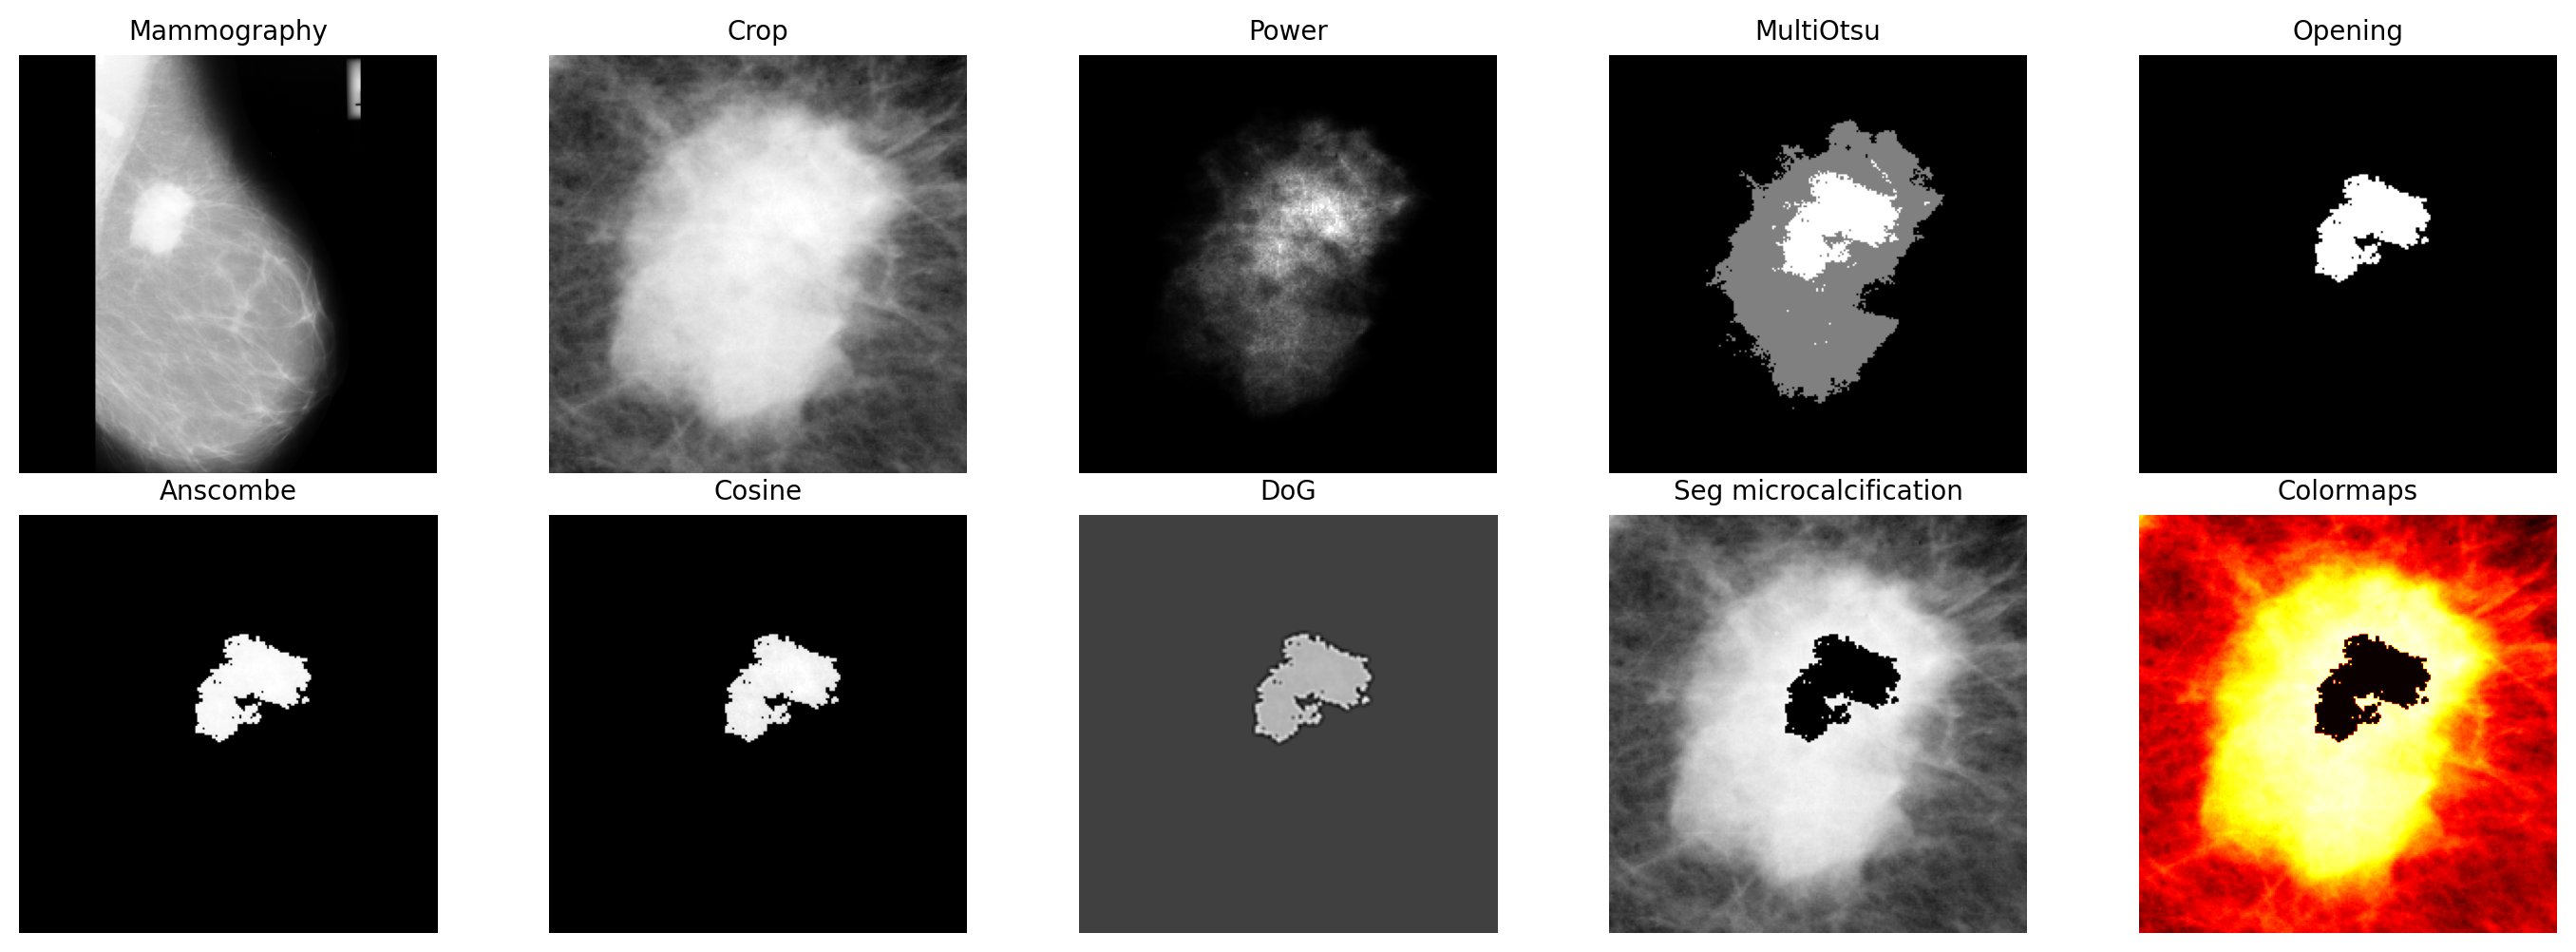

In [2437]:
plotImageTenTittle(initial_img, imag_crop_norm, imag_power, imag_multiOtsu, imag_opening_norm,
                   imag_anscombe_norm, imag_cosine_norm, img_dog_norm,  end_norm, end_norm,
                   'Mammography','Crop','Power','MultiOtsu','Opening','Anscombe',
                                       'Cosine','DoG','Seg microcalcification','Colormaps')